In [1]:
import matplotlib.pyplot as plt
import mpl_finance as mpf
import pandas as pd
import numpy as np

%matplotlib inline

filename = "Data更新_20191231.xlsx"
data     = pd.read_excel(filename, sheet_name='SP500', encoding = 'cp950')

#data.to_csv("Data更新_20191231.csv")

fix_days = 15
tp       = 0.05
sl       = 0.05


In [2]:
def Fix_Days_labels_OnlyOpenPrice(data, fix_days, tp, sl, limitdays=3):
    fix_days = max(fix_days, limitdays)
    data0 = np.array(data[['open','close','high','low']].values)
    r_B   = np.array([np.nan]*len(data)) 
    r_S   = np.array([np.nan]*len(data))
    
    # B 
    for i in range(len(data)-fix_days+1):
        tp_0 = data0[i,0]*(1+tp)
        sl_0 = data0[i,0]*(1-sl)
        tp_n = np.where(data0[i+limitdays-1:i+fix_days, 0]>=tp_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 0]>=tp_0)[0])>0 else fix_days+1
        sl_n = np.where(data0[i+limitdays-1:i+fix_days, 0]<=sl_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 0]<=sl_0)[0])>0 else fix_days+1
        if   tp_n < sl_n: 
            r_B[i]= 1
        elif tp_n > sl_n: 
            r_B[i]=-1
        else : 
            r_B[i]= 0
            
    # S
    for i in range(len(data)-fix_days+1):
        tp_0 = data0[i,0]*(1-tp)
        sl_0 = data0[i,0]*(1+sl)
        tp_n = np.where(data0[i+limitdays-1:i+fix_days, 0]<=tp_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 0]<=tp_0)[0])>0 else fix_days+1
        sl_n = np.where(data0[i+limitdays-1:i+fix_days, 0]>=sl_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 0]>=sl_0)[0])>0 else fix_days+1
        if   tp_n < sl_n:
            r_S[i]= 1
        elif tp_n > sl_n: 
            r_S[i]=-1
        else : 
            r_S[i]= 0        
    return r_B, r_S
    
# type_B = 'fix_{0}days_tp{1:d}_sl{2:d}_labels_B'.format(fix_days, int(tp*100), int(sl*100))
# type_S = 'fix_{0}days_tp{1:d}_sl{2:d}_labels_S'.format(fix_days, int(tp*100), int(sl*100))

# data[type_B], data[type_S] = Fix_Days_labels_OnlyOpenPrice(data, fix_days=fix_days, tp=tp, sl=sl)
# print("\n #--------type_B")
# print(data[type_B].value_counts())
# print("\n #--------type_S")
# print(data[type_S].value_counts())

In [3]:
def Fix_Days_labels(data, fix_days, tp, sl, limitdays=3):
    fix_days = max(fix_days, limitdays)
    data0 = np.array(data[['open','close','high','low']].values)
    r_B   = np.array([np.nan]*len(data)) 
    r_S   = np.array([np.nan]*len(data))
    
    # B 
    for i in range(len(data)-fix_days+1):
        tp_0 = data0[i,0]*(1+tp)
        sl_0 = data0[i,0]*(1-sl)
        #tp_n = np.where(data0[i+limitdays-1:i+fix_days, 1]>=tp_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 1]>=tp_0)[0])>0 else fix_days+1
        sl_n = np.where(data0[i+limitdays-1:i+fix_days, 3]<=sl_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 3]<=sl_0)[0])>0 else fix_days+1
        if   data0[i+fix_days-1,1]>=tp_0 and sl_n > fix_days: 
            r_B[i]= 1
        elif sl_n < fix_days: 
            r_B[i]=-1
        else : 
            r_B[i]= 0
            
    # S
    for i in range(len(data)-fix_days+1):
        tp_0 = data0[i,0]*(1-tp)
        sl_0 = data0[i,0]*(1+sl)
        #tp_n = np.where(data0[i+limitdays-1:i+fix_days, 1]<=tp_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 1]<=tp_0)[0])>0 else fix_days+1
        sl_n = np.where(data0[i+limitdays-1:i+fix_days, 2]>=sl_0)[0][0] if len(np.where(data0[i+limitdays-1:i+fix_days, 2]>=sl_0)[0])>0 else fix_days+1
        if   data0[i+fix_days-1,1]<=tp_0 and sl_n > fix_days:
            r_S[i]= 1
        elif sl_n < fix_days: 
            r_S[i]=-1
        else : 
            r_S[i]= 0        
    return r_B, r_S
    
# data['fix_30days_tp3_sl2_labels_B'], data['fix_30days_tp3_sl2_labels_S'] = Fix_Days_labels(data, fix_days=30, tp=0.03, sl=0.02)
# print("\n #--------fix_30days_tp3_sl2_labels_B")
# print(data['fix_30days_tp3_sl2_labels_B'].value_counts())
# print("\n #--------fix_30days_tp3_sl2_labels_S")
# print(data['fix_30days_tp3_sl2_labels_S'].value_counts())

In [4]:
k_plot = data.loc[:, ["Date", "open", "high", "low", "close"]]
k_plot["Date"] = pd.to_datetime(k_plot["Date"].apply(lambda x: str(x)[:4] + "-" + str(x)[4:6] + "-" + str(x)[6:]))
k_plot.set_index('Date', inplace=True)

In [5]:
k_plot.index[:5].to_pydatetime()

array([datetime.datetime(2000, 1, 3, 0, 0),
       datetime.datetime(2000, 1, 4, 0, 0),
       datetime.datetime(2000, 1, 5, 0, 0),
       datetime.datetime(2000, 1, 6, 0, 0),
       datetime.datetime(2000, 1, 7, 0, 0)], dtype=object)

In [6]:
import datetime

def K_plot(data, d1=(2000, 1, 1), d2=(2020, 1, 1), Indicator=None, Main=None, name=''):  
    if   type(d1)==int and type(d2)==int: print("d1 & d2 int error!"); return
    elif type(d1)==int and type(d2)!=int:
        end   = datetime.datetime(*d2)
        n     = max(np.where(data.index<=end)[0][-1]-d1+1,0)
        start = data.index[n].to_pydatetime()
    elif type(d1)!=int and type(d2)==int:
        start = datetime.datetime(*d1)
        n     = min(np.where(data.index>=start)[0][0]+d2,len(data))
        end   = data.index[n].to_pydatetime()
    else:
        start = datetime.datetime(*d1)
        end   = datetime.datetime(*d2)
    r = np.all([data.index>=start, data.index< end], axis=0)
    print("數量=",np.sum(r))
    
    if Indicator is not None:
        data0 = data.copy()
        if len(Indicator)!=len(data):
            if np.sum(r)!= len(Indicator): print("Indicator size error!!"); return
            tmp = np.zeros([len(data)])
            tmp[r]    = Indicator
            Indicator = tmp
        data0['Indicator'] = Indicator
        data0 = data0.iloc[r, :]
        fig, (ax, ax2) = plt.subplots(2, 1, sharex=True, figsize=(17, 10))
    else:
        data0 = data.iloc[r, :]
        fig = plt.figure(figsize=(17, 10))
        ax  = fig.add_axes([0,0.3,1,0.4])

    ax.set_xticks(range(0, len(data0.index), int(len(data0.index)/14-1)))
    ax.set_xticklabels(data0.index[::int(len(data0.index)/14-1)], rotation=30)
    ax.grid(True)
    
    mpf.candlestick2_ochl(ax, data0['open'], data0['close'], data0['high'],
                          data0['low'], width=0.5, colorup='r', colordown='g', alpha=0.75)
    
    if Main is not None:
        if type(Main[:,0])==type(start):
            dr = np.all([Main[:,0]>=start, Main[:,0]< end], axis=0)
            loc= np.array([np.where(k_plot.index==x)[0][0] for x in Main[dr,0]]) - np.where(r)[0][0]
        else:
            dr = np.all([data.index[np.int16(Main[:,0])]>=start, data.index[np.int16(Main[:,0])]< end], axis=0)
            loc= np.array([np.where(k_plot.index==x)[0][0] for x in data.index[np.int16(Main[dr,0])]]) - np.where(r)[0][0]
        ax.plot(loc, Main[dr,1])    
        
    if Indicator is not None:
        data0['Indicator'].plot(kind='bar', color='mediumblue', alpha=1)
        ax2.set_xticks(range(0, len(data0.index), int(len(data0.index)/14-1)))
        ax2.set_xticklabels(data0.index[::(int(len(data0.index)/14-1))], rotation=30)
        ax2.grid(True)

        plt.subplots_adjust(hspace=0)
    
    if name!='':
        plt.savefig(name)

In [7]:
# draw plot
def drawplot(data, target, color='red'):
    data[target].plot(color=color)
    plt.title(target)
    #plt.grid(True)
    plt.show()

# agg function
def trim(values, ratio=0.3):
    n = len(values)
    return np.average(sorted(np.array(values))[int(round(n*ratio)):int(round(n*(1-ratio)))])

In [8]:
# extract feature 
def DayBias(data, days):
    return data['high']-data['low']

def DayATR(data, days, target):
    return data[target].abs().rolling(window=days).agg(trim)

def MA(data, days, target):
    return data[target].rolling(window=days).mean()

def MACD(data, days, target):
    MA_value = MA(data, days, target)
    return data[target]-MA_value

def RSV(data, periods, target):
    return (data[target] - data[target].rolling(window=periods).min()) / (data[target].rolling(window=periods).max() - data[target].rolling(window=periods).min())

def KD(data, periods, target, ratio=0.666):
    RSV_value = RSV(data, periods, target)
    na_value  = RSV_value.isna()
    # RSV_value = RSV_value.values
    k = [50]
    d = [50]
    for i in range(len(data)):
        if i == 0:  continue
        if na_value[i]: k.append(k[-1]); d.append(d[-1]); continue
        k.append(k[-1]*ratio+RSV_value[i]*(1-ratio)*100)
        d.append(d[-1]*ratio+k[-2]*(1-ratio))
    return k, d, np.array(k)-np.array(d)
   
def BIAS(data, days, target):
    MA_value = MA(data, days, target)
    return (data[target]-MA_value)/MA_value


In [9]:
def Grab_TP(data, tp_Period=3, normal_Period=22, normalReturn=False):
    normal_D = abs(data["open"]-data["close"]).rolling(window=normal_Period).agg(trim).values
    
    open_i   = data.columns.get_loc("open")
    high_i   = data.columns.get_loc("high")
    close_i  = data.columns.get_loc("close")
    low_i    = data.columns.get_loc("low")

    result = np.ones(len(data))*2
    d0     = np.array(data).copy()
    value  = 2
    for i in range(tp_Period-1, len(data)-1):
        if np.isnan(normal_D[i]): result[i] = value; continue
        dis = (d0[i,close_i] - d0[i,open_i])/ normal_D[i]
        if abs(dis) < 0.8 : result[i] = value; continue
        
        d1 = d0[i-tp_Period+1:i+1, :]
        
        # s
        imax = np.argmax(d1[:, high_i])
        thre = np.min(d1[imax, [open_i, close_i]])
        if imax!=i and thre>d1[-1,close_i] and dis<   0: result[i] = -2
        if imax==i and dis < -2: result[i] = -2
        
        # b
        imin = np.argmin(d1[:, low_i])
        thre = np.max(d1[imin, [open_i, close_i]])
        if imin!=i and thre<d1[-1,close_i] and dis>   0: result[i] =  2 
        if imin==i and dis > +2: result[i] =  2 
        value = result[i]
            
    if normalReturn: return np.array(result), np.array(normal_D)
    return np.array(result)

tp_indi = Grab_TP(data, tp_Period=3, normal_Period=22)

In [10]:
def TP_HL_Position(data, tp_Period=3, normal_Period=22, normalReturn=False):
    tp, normal_D = Grab_TP(data, tp_Period, normal_Period, True)
    
    open_i   = data.columns.get_loc("open")
    high_i   = data.columns.get_loc("high")
    close_i  = data.columns.get_loc("close")
    low_i    = data.columns.get_loc("low")

    result = []
    d0     = np.array(data).copy()
    dir0_n = np.where(tp!=0)[0][0]
    dir0_v = tp[dir0_n]
    
    while True:
        tmp_n = np.where(tp[int(dir0_n)+1:]==dir0_v*(-1))[0]
        if len(tmp_n)==0: break
        tmp_n = tmp_n[0] + dir0_n+1
        if dir0_v>0:
            n = np.argmax(d0[int(dir0_n):int(tmp_n)+1, high_i]) + int(dir0_n)
            result.append([data.index[n], d0[n, high_i]])
            #result[n] = d0[n, high_i]         
        if dir0_v<0:
            n = np.argmin(d0[int(dir0_n):int(tmp_n)+1, low_i]) + int(dir0_n)
            result.append([data.index[n], d0[n, low_i]])
            #result[n] = d0[n, low_i]
        dir0_n= tmp_n
        dir0_v= dir0_v*(-1)
    
    if normalReturn: return np.array(result), tp
    return np.array(result)

tp_pos = TP_HL_Position(data, tp_Period=3, normal_Period=22)

In [11]:
print(tp_pos[::-1][:5])
np.where(tp_indi[:35]==-2)

[[5031.   3212.03]
 [5029.   3247.93]
 [5012.   3070.33]
 [5009.   3154.26]
 [5004.   3091.41]]


(array([28, 29, 31, 32, 33, 34]),)

In [11]:
# import itertools 
# import numpy as np
# R   = list(itertools.permutations([x for x in range( 4)], 3))
# pos = itertools.permutations(R ,12)
# minv= 3*len(R)

# while True:
#     try:    
#         tmp = next(pos)
#         tmp2= np.array(tmp[0])
#         for v in tmp[1:]:
#             v = np.array(v)
#             if   np.all(tmp2[-2:]==v[:2]):
#                 tmp2 = np.concatenate((tmp2, v[2:]), axis=None)
#             elif tmp2[-1:]==v[:1]:
#                 tmp2 = np.concatenate((tmp2, v[1:]), axis=None)
#             else:
#                 tmp2 = np.concatenate((tmp2, v[0:]), axis=None)
#         if len(tmp2)<minv:
#             minv = len(tmp2)
#             result = tmp2
#             print("N=",len(tmp2), "   -> ", tmp2)
#     except StopIteration:
#         break

#np.concatenate((R[0][:2], R[1]), axis=None)
# N= 36    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 0 1 2 3 1 3 0 1 3 2]
# N= 34    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 0 1 2 3 1 3 0 1]
# N= 32    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 0 1 2 3 0 1]
# N= 31    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 0 1 2 3 0]
# N= 30    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 3 1 2 0]
# N= 29    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 0 3 1 2 3 0 1]
# N= 28    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 2 3 1 2 0 1]
# N= 27    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 0 2 1 3 2 1 0 3]
# N= 26    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 0 1 2 3 1 2 0 3]
# N= 25    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 0 1 2 3 1 0 2]
# N= 24    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 2 0 3 2 1 3 0 1]
# N= 23    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 3 2 0 1]
# N= 22    ->  [0 1 2 0 1 3 0 2 1 0 2 3 0 3 1 0 3 2 1 3 0 1]
parameter_Order = [0,1,2,0,1,3,0,2,1,0,2,3,0,3,1,0,3,2,1,3,0,1]

In [12]:
#clipdata
def ClipData_1(data, limitDays=60, priceRange=3, atrPeriod=66):
    data0 = data.copy()
    data0["DayBias(1)"]  = DayBias(data0, days=1)
    atr   = np.array(DayATR(data0, days=atrPeriod, target="DayBias(1)"))
    data0 = np.array(data0[["open","high","close","low"]])
    
    result= []
    for i in range(len(atr)):
        if i==0:               result.append(np.nan); continue
        if np.isnan(atr[i-1]): result.append(np.nan); continue
        if i <limitDays      : result.append(np.nan); continue
        price= data0[i,0]
        bias = atr[i-1]*priceRange
        
        mask = np.all([data0[:i,3]<=price+bias, data0[:i,1]>=price-bias], axis=0)
        
        fals1 = np.where(mask==False)[0]
        if len(fals1)==0: result.append(data0[:i,:]); continue
        true2 = np.where(mask[:fals1[-1]]== True)[0]
        if len(true2)==0: result.append(data0[min(fals1[-1],i-limitDays):i,:]); continue
        fals2 = np.where(mask[:true2[-1]]==False)[0]
        if len(fals2)==0: result.append(data0[:i,:]); continue
        result.append(data0[min(fals2[-1]+1,i-limitDays):i,:]);
        
        if i>=500: break
    return result

def AreaCheck(v1, v2, rank, startN, limitDays=60, bias=3, turnPointN=1):
    vmax = max(v1, v2)
    vmin = min(v1, v2)
    result = [True]
    for i in range(1, len(rank)):
        vmax0 = max(rank[::-1][i,1], rank[::-1][i-1,1])
        vmin0 = min(rank[::-1][i,1], rank[::-1][i-1,1])
        result.append(vmax>=vmin0 and vmin<=vmax0)
#         print("vmax={0}, vmin={1}, vmax0={2}, vmin0={3}, {4}".format(vmax, vmin, vmax0, vmin0, result[-1]))
#     print(result)
    result = np.array(result)
    recordN= 0
    tmpN   = np.where(result==False)[0]
    for _ in range(turnPointN):
        for dirV in [True, False]:
            if len(tmpN)==0: break
            recordN= tmpN[0] + recordN
            tmpN   = np.where(result[recordN:]==dirV)[0]
    if len(tmpN)==0 and result[recordN]==True: recordN = np.where(result[recordN:]==True)[0][-1]+recordN
    if len(tmpN)!=0                          : recordN= tmpN[0] + recordN - 1 
    recordN = min(startN-limitDays+1, max(0,rank[::-1][recordN,0]-bias))
    return int(recordN)

def ClipData_2(data, limitDays=60, priceRange=1, atrPeriod=66, centerV=1):
    data0 = data.copy()
    data0["DayBias(1)"]  = DayBias(data0, days=1)
    atr   = np.array(DayATR(data0, days=atrPeriod, target="DayBias(1)"))
    data0 = np.array(data0[["open","high","close","low"]])
    tp_pos, tp_indi = TP_HL_Position(data, tp_Period=3, normal_Period=22, normalReturn=True)
    
    result= []
    for i in range(len(atr)):
        if i==0:               result.append(np.nan); continue
        if np.isnan(atr[i-1]): result.append(np.nan); continue
        if i <limitDays      : result.append(np.nan); continue
        if np.sum(tp_indi[:i]==tp_indi[i-1]*(-1))==0: result.append(np.nan); continue
        
        typeKind = tp_indi[i-1]
        n1 = np.where(tp_indi[: i]==tp_indi[i-1]*(-1))[0][-1]
        n2 = np.where(tp_indi[:n1]==tp_indi[i-1]     )[0][-1]
        
        if tp_indi[i-1]>0: 
            v1 = np.max(data0[n1+1:i, 1]) + atr[i-1]*priceRange
            v2 = np.min(data0[n2+1:i, 3]) - atr[i-1]*priceRange
        else: 
            v1 = np.min(data0[n1+1:i, 3]) - atr[i-1]*priceRange
            v2 = np.max(data0[n2+1:i, 1]) + atr[i-1]*priceRange   
            
        rank = np.where(tp_pos[:,0]<=i-1)[0]
        #print(tp_pos[rank][-2:]," v1={0}, v2={1}, n1={2}, n2={3}, i={4}, type={5}, type_n1={6}, type_n2={7}, atr={8}".format(v1,v2,n1,n2,i-1, tp_indi[i-1], tp_indi[n1], tp_indi[n2], atr[i-1]))
        N = AreaCheck(v1=v1, v2=v2, rank=tp_pos[rank], startN=i-1, limitDays=limitDays)
        #print("N=",N)
        d0= np.float32(np.append(data0[N:i,:].copy(), [[data0[i,0]]*4], axis=0))
        r0= (np.max(d0)-np.min(d0))/atr[i-1]
        d0= (d0-np.min(d0))/(np.max(d0)-np.min(d0))
        d0= d0-d0[-1,0]+centerV
        result.append([d0,r0])
    return result


# Train Dataset Preparation

In [68]:
dataest = ClipData_2(data, limitDays=60, priceRange=1, atrPeriod=66)

In [92]:
def grabData(label, startT=None, endT=None):
    startT0, endT0= str(k_plot.index[ 0]).split(" ")[0], str(k_plot.index[-1]).split(" ")[0]
    if startT is None: startT=startT0
    if endT   is None: endT  =endT0
    startT0, endT0 = np.int16(startT0.split("-")), np.int16(endT0.split("-"))
    startT , endT  = np.int16(startT .split("-")), np.int16(endT .split("-"))
    startT = datetime.datetime(*startT) 
    startT = startT if (startT>=datetime.datetime(*startT0) and startT<=datetime.datetime(*endT0)) else datetime.datetime(*startT0)
    endT   = datetime.datetime(*endT)   
    endT   = endT   if (endT  >=datetime.datetime(*startT0) and endT  <=datetime.datetime(*endT0)) else datetime.datetime(*endT0)
    
    startT = int(np.where(k_plot.index>=startT)[0][ 0])
    endT   = int(np.where(k_plot.index<=endT  )[0][-1])
    
    x      = dataest[startT:endT].copy()
    y      = np.int16(data[label].iloc[startT:endT].values)
    y[y==-1]=2
    y      = np.eye(3)[y]
    return x, y

grabData(label='fix_10days_tp5_sl2_labels_B', startT="2019-1-8", endT="2020-3-8")

373

In [64]:
dataest[5016:5031]

array([list([array([[0.56539917, 0.5825623 , 0.54924184, 0.5341909 ],
       [0.5124358 , 0.531811  , 0.5176317 , 0.4931947 ],
       [0.5099553 , 0.54528654, 0.54357696, 0.50345236],
       [0.5294983 , 0.55071735, 0.54702973, 0.45263475],
       [0.55919826, 0.59818286, 0.547231  , 0.5350625 ],
       [0.55269456, 0.57934445, 0.4978882 , 0.47311568],
       [0.46916044, 0.5216205 , 0.49691594, 0.46490318],
       [0.53261554, 0.5512199 , 0.41251016, 0.38277662],
       [0.41837633, 0.49034595, 0.4737532 , 0.36645228],
       [0.47663558, 0.48183143, 0.44945043, 0.40282214],
       [0.47576392, 0.4819321 , 0.39638638, 0.3418811 ],
       [0.41408557, 0.47033393, 0.44650018, 0.41408557],
       [0.46979713, 0.49943   , 0.3241819 , 0.31898594],
       [0.27232492, 0.27232492, 0.14772749, 0.10522223],
       [0.14025152, 0.22656822, 0.22489214, 0.04156578],
       [0.25147498, 0.36940175, 0.36360264, 0.25147498],
       [0.33752322, 0.38954794, 0.31928796, 0.30886257],
       [0.25764227

In [57]:
dataest[66]#[:,parameter_Order].s

[array([[0.95993644, 0.9767701 , 0.92029446, 0.8784956 ],
        [0.904874  , 0.904874  , 0.7819567 , 0.77702314],
        [0.7725357 , 0.8162932 , 0.7886255 , 0.7280594 ],
        [0.780593  , 0.8128967 , 0.7919475 , 0.7636107 ],
        [0.7919475 , 0.8862058 , 0.8862058 , 0.78520423],
        [0.8862058 , 0.9429541 , 0.9261949 , 0.8862058 ],
        [0.9181624 , 0.92882293, 0.8789916 , 0.8687278 ],
        [0.8789916 , 0.8890073 , 0.8633479 , 0.85053045],
        [0.8726944 , 0.9177656 , 0.90656   , 0.86409175],
        [0.90656   , 0.96437424, 0.9449128 , 0.90656   ],
        [0.9449128 , 0.9449128 , 0.9200962 , 0.9105763 ],
        [0.91228676, 0.93559104, 0.92198044, 0.90408087],
        [0.92198044, 0.946301  , 0.89637035, 0.87894195],
        [0.90455174, 0.9152371 , 0.8859331 , 0.88156974],
        [0.8933706 , 0.917493  , 0.78812975, 0.77203995],
        [0.7905097 , 0.8187475 , 0.8082607 , 0.75485915],
        [0.8010462 , 0.81495434, 0.7935342 , 0.78379124],
        [0.793

In [15]:
n = 66
startN =0
stopN  =2000
for i,v  in enumerate(dataest[max(n,startN):]):
    print(i+max(n,startN),"=",len(v[0]))
    if i >= stopN: break
    #print(i,"=",len(v))


66 = 67
67 = 68
68 = 69
69 = 70
70 = 71
71 = 72
72 = 73
73 = 74
74 = 75
75 = 76
76 = 77
77 = 78
78 = 79
79 = 80
80 = 81
81 = 82
82 = 83
83 = 84
84 = 85
85 = 86
86 = 87
87 = 88
88 = 89
89 = 90
90 = 91
91 = 92
92 = 93
93 = 94
94 = 95
95 = 96
96 = 97
97 = 98
98 = 99
99 = 100
100 = 101
101 = 102
102 = 103
103 = 104
104 = 105
105 = 106
106 = 107
107 = 108
108 = 109
109 = 110
110 = 111
111 = 112
112 = 113
113 = 114
114 = 115
115 = 116
116 = 117
117 = 118
118 = 119
119 = 120
120 = 121
121 = 122
122 = 123
123 = 124
124 = 125
125 = 126
126 = 127
127 = 128
128 = 129
129 = 130
130 = 131
131 = 132
132 = 133
133 = 134
134 = 135
135 = 136
136 = 137
137 = 61
138 = 92
139 = 93
140 = 94
141 = 95
142 = 96
143 = 144
144 = 145
145 = 146
146 = 61
147 = 113
148 = 114
149 = 115
150 = 151
151 = 152
152 = 153
153 = 154
154 = 108
155 = 156
156 = 157
157 = 158
158 = 159
159 = 160
160 = 161
161 = 162
162 = 163
163 = 164
164 = 165
165 = 166
166 = 167
167 = 168
168 = 61
169 = 61
170 = 61
171 = 61
172 = 77
173 = 78


In [13]:
k_plot.index[1500]

Timestamp('2005-12-19 00:00:00')

In [16]:
np.sum(data['fix_10days_tp5_sl2_labels_B'].iloc[-10:]==0)

1

In [22]:
print(np.sum(k_plot.index >= datetime.datetime(2018,1,1)))
k_plot.index[k_plot.index >= datetime.datetime(2018,1,1)][263-229:263+1]

503


DatetimeIndex(['2018-02-21', '2018-02-22', '2018-02-23', '2018-02-26',
               '2018-02-27', '2018-02-28', '2018-03-01', '2018-03-02',
               '2018-03-05', '2018-03-06',
               ...
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18'],
              dtype='datetime64[ns]', name='Date', length=230, freq=None)

數量= 229


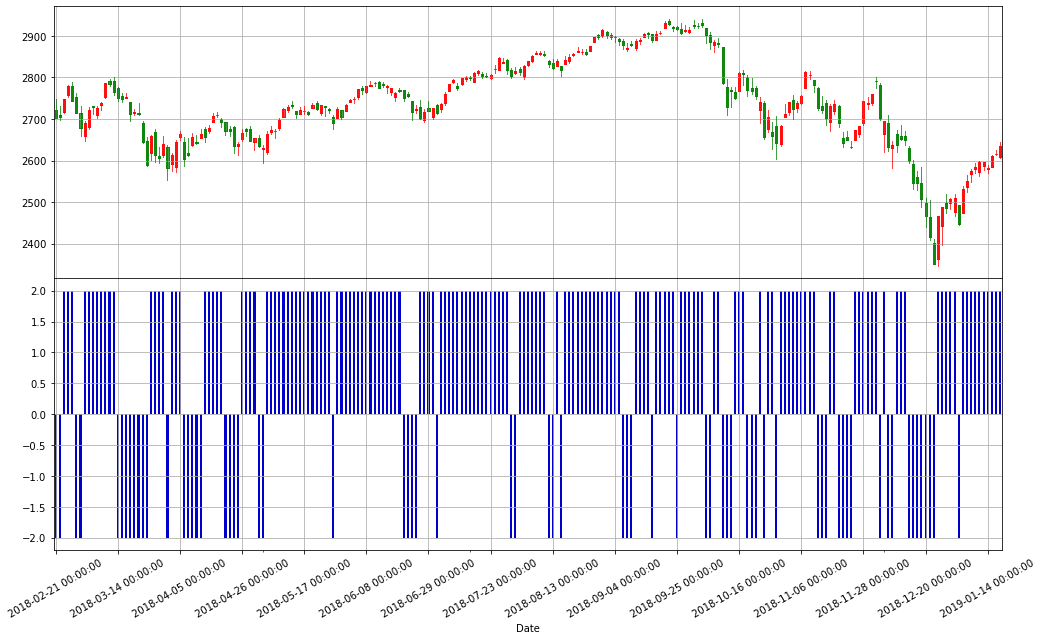

In [23]:
K_plot(k_plot, d1=(2018, 2, 21), d2=(2019, 1, 18), Indicator=tp_indi)
# K_plot(k_plot, d1=(2018, 1, 1), d2=(2020, 1, 1), Indicator=np.array(data['fix_10days_tp5_sl2_labels_B']), Main=tp_pos)